In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [99]:
# Reading the file
df=pd.read_csv('titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
# checking colulmn datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
#Describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [103]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

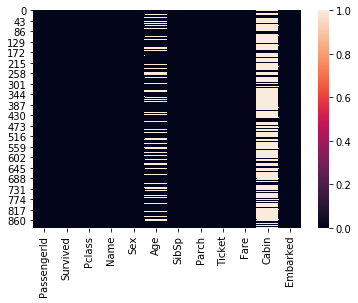

In [104]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [105]:
# Dropping the Cabin column as it doesn't affect prediction of the Survived passengers
# For Age filling the median value.
# For Embarked filling the value 'S'

#print("Null Age: ",df["Age"].isnull().sum())
print("median age: ",df['Age'].median())    
df.fillna({'Age':df['Age'].median()}, inplace=True)
print("POST update Age null count: ",df["Age"].isnull().sum())

# Embarked
#print("embarked null count: ",df['Embarked'].isnull().sum())
df.fillna({'Embarked':'S'},inplace=True)
print("Post update embarked null count: ",df['Embarked'].isnull().sum())

median age:  28.0
POST update Age null count:  0
Post update embarked null count:  0


In [106]:
# Re-checking for null values 
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [107]:
# Dropping Cabin column as it doesnt affect the prediction
df_new=df.drop(columns=['Cabin','Name','Ticket'])
#print(df_new)
df_new.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Parch          0
SibSp          0
Age            0
Sex            0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [108]:
# Setting x
x=df_new.loc[:,df_new.columns != 'Survived']
x

# Setting label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

x['Sex']=le.fit_transform(x['Sex'])
x['Embarked']=le.fit_transform(x['Embarked'])
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [109]:
# Setting y
y=df_new['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [111]:
x=scale.fit_transform(x)

In [112]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)

Accuracy_Score corresponding to r_state:  42  is  0.8026905829596412
Accuracy_Score corresponding to r_state:  43  is  0.7443946188340808
Accuracy_Score corresponding to r_state:  44  is  0.7443946188340808
Accuracy_Score corresponding to r_state:  45  is  0.8340807174887892
Accuracy_Score corresponding to r_state:  46  is  0.8385650224215246
Accuracy_Score corresponding to r_state:  47  is  0.8116591928251121
Accuracy_Score corresponding to r_state:  48  is  0.7847533632286996
Accuracy_Score corresponding to r_state:  49  is  0.8071748878923767
Accuracy_Score corresponding to r_state:  50  is  0.8116591928251121
Accuracy_Score corresponding to r_state:  51  is  0.7847533632286996
Accuracy_Score corresponding to r_state:  52  is  0.7982062780269058
Accuracy_Score corresponding to r_state:  53  is  0.7757847533632287
Accuracy_Score corresponding to r_state:  54  is  0.7713004484304933
Accuracy_Score corresponding to r_state:  55  is  0.757847533632287
Accuracy_Score corresponding to r_s

In [113]:
# Setting the test x & y values
# Setting the train x & y values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=76)

In [114]:
train_x.shape

(668, 8)

In [115]:
train_y.shape

(668,)

In [116]:
test_x.shape

(223, 8)

In [117]:
test_y.shape

(223,)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [119]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [120]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [121]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [122]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    print("\n")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,threshold=roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score= ",roc_auc)
    rocscore.append(roc_auc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n\n")

-------------- KNeighborsClassifier --------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Accuracy Score:  0.8251121076233184
Cross_Val_Score:  0.804756554307116
roc_auc_score=  0.7882996632996634
[[130   5]
 [ 34  54]]



-------------- SVC --------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  0.8340807174887892
Cross_Val_Score:  0.8170661672908863
roc_auc_score=  0.8075757575757575
[[126   9]
 [ 28  60]]



-------------- LogisticRegression --------------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
          

In [123]:
result=pd.DataFrame({"Model": Model, "Accuracy_Score": score,"Cross_Val_Score":cvs,"ROC_Auc_Curve":rocscore})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,82.511211,80.475655,78.829966
1,SVC,83.408072,81.706617,80.757576
2,LogisticRegression,85.650224,79.238452,83.994108
3,DecisionTreeClassifier,74.887892,74.980025,73.324916
4,GaussianNB,83.408072,78.676654,82.340067


# I choose LogisticRegression Model based on the stats above.

In [124]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(lg,"lg_titanic.pkl")

['lg_titanic.pkl']